# 1. Manual Selection

 Y = MX + C ( X = Predictor, Y = Predictand)

In [1]:
from google.colab import drive
import numpy as np
import sys
import time
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')
!ln -s "/content/drive/My Drive/Academic/CSCM 72 - Optimisation/Assignment/data"

Mounted at /content/drive


In [3]:
def mean_square_error(x, y, theta):
  m = theta[0]
  c = theta[1]

  y_hat = m*x + c
  error = y - y_hat
  mse = np.dot(error, error)

  return mse

In [4]:
theta = np.array([0.7, 1.9])
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

mse = mean_square_error(x, y, theta)
print(mse)

2.5


# 2. Grid Search Implementation

In [5]:
def grid_search(k, search_range, x, y):
  """
  k = (n, 1) = number of regular intervals
  range = (n, 2) = minimum and maximum of each dimension
  x = predictor
  y = predictand
  """
  n = len(k)
  theta_cmb = [None]*n

  for i in range(0, n):
    k_i = k[i]
    search_range_i = search_range[i]
    theta_i = np.linspace(*search_range_i, k_i)
    theta_cmb[i] = theta_i
  
  theta_cmb = np.array(np.meshgrid(*theta_cmb)).T.reshape(-1,n)
  no_cmb = len(theta_cmb)
  mse_cmb = [sys.maxsize]*no_cmb
  
  i = 0
  for theta in theta_cmb:
    mse = mean_square_error(x, y, theta)
    mse_cmb[i] = mse
    i = i + 1
  
  min_index = np.argmin(mse_cmb)
  optimal_selection = theta_cmb[min_index]
  min_mse = mse_cmb[min_index]
  
  return optimal_selection, min_mse

In [6]:
k = np.array([20, 20])
search_range = np.array([
    [0, 2],
    [0, 2]
])
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

optimal_selection, min_mse = grid_search(k, search_range, x, y)
print(optimal_selection)
print(min_mse)

[0.63157895 2.        ]
2.465373961218838


# 3. Random Search Implementation

In [9]:
def random_search(search_range, x, y, N):
  """
  search_range = (dimension, 2) = minimum and maximum of each dimension
  x = predictor
  y = predictand
  N = Number of iterations
  """
  dimension = len(search_range) # len(ndarray) = first dimension of the array
  theta_cmb = theta_i = np.random.uniform(low = search_range[:, 0], high = search_range[:, 1], size = (N, dimension))

  no_cmb = len(theta_cmb)
  mse_cmb = [sys.maxsize]*no_cmb
  
  i = 0
  for theta in theta_cmb:
    mse = mean_square_error(x, y, theta)
    mse_cmb[i] = mse
    i = i + 1
  
  min_index = np.argmin(mse_cmb)
  optimal_selection = theta_cmb[min_index]
  min_mse = mse_cmb[min_index]
  
  return optimal_selection, min_mse

# 4. Performance Analysis

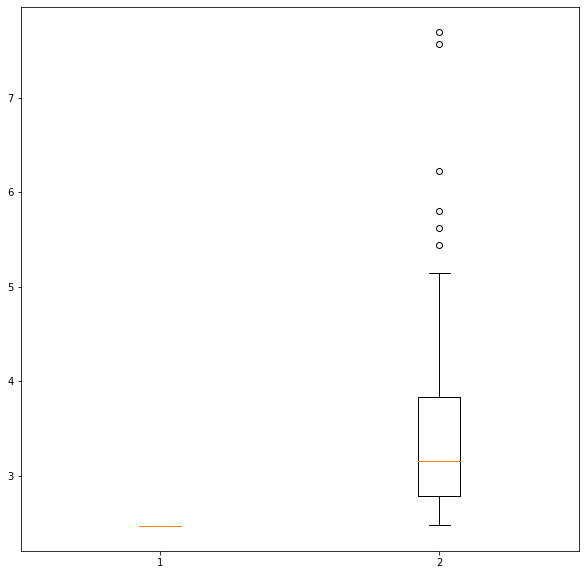

In [10]:
min_mse_values_grid = np.zeros(100)
for i in range(0, 100):
  optimal_selection, min_mse = grid_search(k, search_range, x, y)
  min_mse_values_grid[i] = min_mse

min_mse_values_random = np.zeros(100)
for i in range(0, 100):
  optimal_selection, min_mse = random_search(search_range, x, y, 20)
  min_mse_values_random[i] = min_mse


# Box plot represents minimum, first quartile, median, third quartile, maximum values.
fig = plt.figure(figsize=(10, 10))
plt.boxplot([min_mse_values_grid, min_mse_values_random])
plt.show()

# 4. References

[1] https://builtin.com/data-science/boxplot